## 특이점 분해 - SVD

- 정의 : $ X = U \Sigma{V^{T}} $
- 데이터에 적용된 연산 = (회전)(회전)(회전)

- $U$의 열은 데이터 행렬의 좌측 특이벡터, $V$의 열은 우측 특이 벡터라 불림<br>
- $\Sigma$의 대각선값은 특이값

$U$ : 공분산 행렬의 고유 벡터<br>
$\Sigma$의 대각선값 : 공분산 행렬 고유값의 제곱근

장단점
- 고유값은 정방 행렬에 관해서만 정의, SVD는 임의의 사각 행렬에도 적용 가능
- 행렬 A의 고유 벡터 P가 비가역 행렬이면 A는 고유값 분해를 갖지 않는다. 그러나 A가 m x n 실수 행렬이고, m > n이면 A는 특이값 분해를 사용할 수 있음
- $U$와 $V$가 서로 직교행렬이면 $U^{T}U = I$이거나 $V^{T}V = I$이며, 두 단위 행렬은 서로 다른 차원을 가질 수 있음
- $\Sigma$는 m x n 차원의 음수가 아닌 대각 행렬이다

계산방법
정의로부터 $ X = U \Sigma{V^{T}} $<br>
따라서, $X^{T}$는 다음과 같이 쓸 수 있다.<br>
$X^{T} = V\Sigma^{T}U^{T}$이고<br>
$X^{T}X = V\Sigma^{T}V^{T} = \lambda I$<br>
고유값을 구하기 위해서<br>
$ det(X^{T}X - \lambda I) = 9 $<br>
특이값, 고유값을 구하고 나면, 우측, 좌측 특이벡터를 구할 수 있다.


### scikit-learn을 사용한 필기체 숫자에 SVD 적용

In [1]:
# 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

C:\Users\bcduc\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bcduc\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# 데이터 분할
X = digits.data
y = digits.target

In [4]:
# 특이점 분해 SVD
from sklearn.utils.extmath import randomized_svd
U,Sigma,VT = randomized_svd(X, n_components = 15, n_iter = 300, random_state = 42)
X.shape, U.shape, Sigma.shape, VT.shape

((1797, 64), (1797, 15), (15,), (15, 64))

In [15]:
n_comps = 15
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = n_comps, n_iter = 300, random_state = 42)
reduced_X = svd.fit_transform(X)

In [22]:
svd.explained_variance_ratio_.sum()

0.833814659028609

In [25]:
# 특이값 개수 설정
max_singfeat = 30
singfeats = list()
totexp_var = list()

for i in range(max_singfeat):
    svd = TruncatedSVD(n_components = i+1, n_iter = 300, random_state = 42)
    reduced_X = svd.fit_transform(X)
    tot_var = svd.explained_variance_ratio_.sum()
    singfeats.append(i+1)
    totexp_var.append(tot_var)

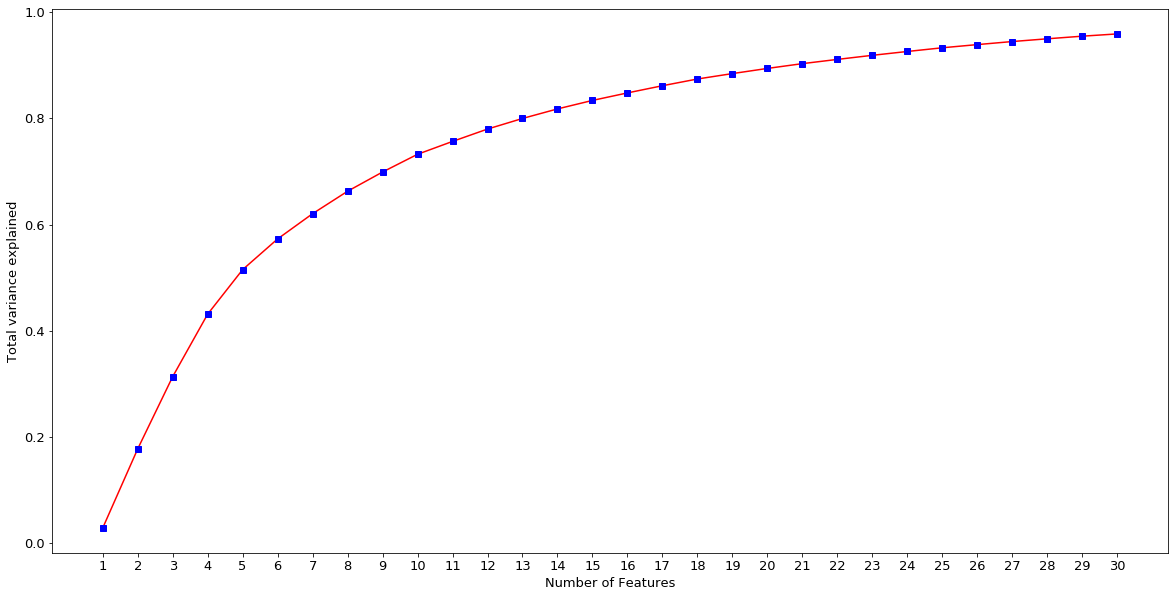

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.plot(singfeats, totexp_var, 'r')
plt.plot(singfeats, totexp_var, 'bs')
plt.xlabel('Number of Features', fontsize = 13)
plt.ylabel('Total variance explained', fontsize = 13)

plt.xticks(singfeats, fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()